In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from glob import glob
import seaborn as sns

In [13]:
data_dir = "/Users/ankitsanjyal/Desktop/Projects/Data/Hamm10000"

In [14]:
skin_df = pd.read_csv(os.path.join(data_dir,'HAM10000_metadata'))
skin_df.head()

lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

        dataset  
0  vidir_modern  
1  vidir_modern  
2  vidir_modern  
3  vidir_modern  
4  vidir_modern

In [15]:
imageid_path = {os.path.splitext(os.path.basename(x))[0] : x
                for x in glob(os.path.join(data_dir,"*","*.jpg"))}

lesion_type = {
    'nv': 'Melanocytic_nevi',
    'mel': 'melanoma',
    'bkl': 'Benign_keratosis-like_lesions',
    'bcc': 'Basal_cell_carcinoma',
    'akiec': 'Actinic_keratoses',
    'vasc': 'Vascular_lesions',
    'df': 'Dermatofibroma'
}

# 0 for benigh and 1 for malignant
lesion_danger = {
    'nv': 0,
    'mel': 1, 
    'bkl': 0,
    'bcc': 1,
    'akiec': 1,
    'vasc': 0,
    'df': 0
}

In [ ]:
skin_df['path'] = skin_df['image_id'].map(imageid_path.get) #mapping image id to the path of that image
skin_df['cell_type'] = skin_df['dx'].map(lesion_type.get) # giving dx a full name
skin_df['Malignant'] = skin_df['dx'].map(lesion_danger.get) # marking danger label

skin_df.head()

lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

        dataset                                               path  \
0  vidir_modern  /Users/ankitsanjyal/Desktop/Projects/Data/Hamm...   
1  vidir_modern  /Users/ankitsanjyal/Desktop/Projects/Data/Hamm...   
2  vidir_modern  /Users/ankitsanjyal/Desktop/Projects/Data/Hamm...   
3  vidir_modern  /Users/ankitsanjyal/Desktop/Projects/Data/Hamm...   
4  vidir_modern  /Users/ankitsanjyal/Desktop/Projects/Data/Hamm...   

                       cell_type  Malignant  
0  Benign_keratosis-like_lesions          0  
1  Benign_keratosis-like_lesions          0  
2  Benign_keratosis-like_lesions          0  
3  Benign_keratosis-like_lesions          0  
4  Benign_keratosis-like_lesions          0

In [ ]:
#giving each cell type a category id
skin_df["cell_type_idx"] = pd.Categorical(skin_df["cell_type"]).codes
skin_df.head()

lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

        dataset                                               path  \
0  vidir_modern  /Users/ankitsanjyal/Desktop/Projects/Data/Hamm...   
1  vidir_modern  /Users/ankitsanjyal/Desktop/Projects/Data/Hamm...   
2  vidir_modern  /Users/ankitsanjyal/Desktop/Projects/Data/Hamm...   
3  vidir_modern  /Users/ankitsanjyal/Desktop/Projects/Data/Hamm...   
4  vidir_modern  /Users/ankitsanjyal/Desktop/Projects/Data/Hamm...   

                       cell_type  Malignant  cell_type_idx  
0  Benign_keratosis-like_lesions          0              2  
1  Benign_keratosis-like_lesions          0              2  
2  Benign_keratosis-like_lesions          0              2  
3  Benign_keratosis-like_lesions          0              2  
4  Benign_keratosis-like_lesions          0              2

## Let's do some plotting

<Axes: title={'center': 'Benign vs Malignant'}, xlabel='Malignant'>

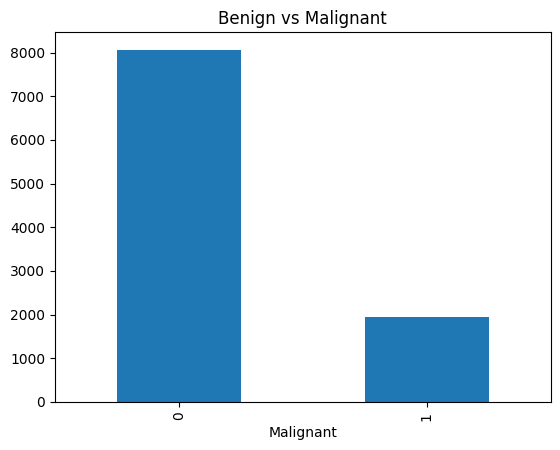

In [18]:
skin_df['Malignant'].value_counts().plot(kind='bar',title="Benign vs Malignant")

<Axes: title={'center': 'counts for each lesions'}, xlabel='cell_type'>

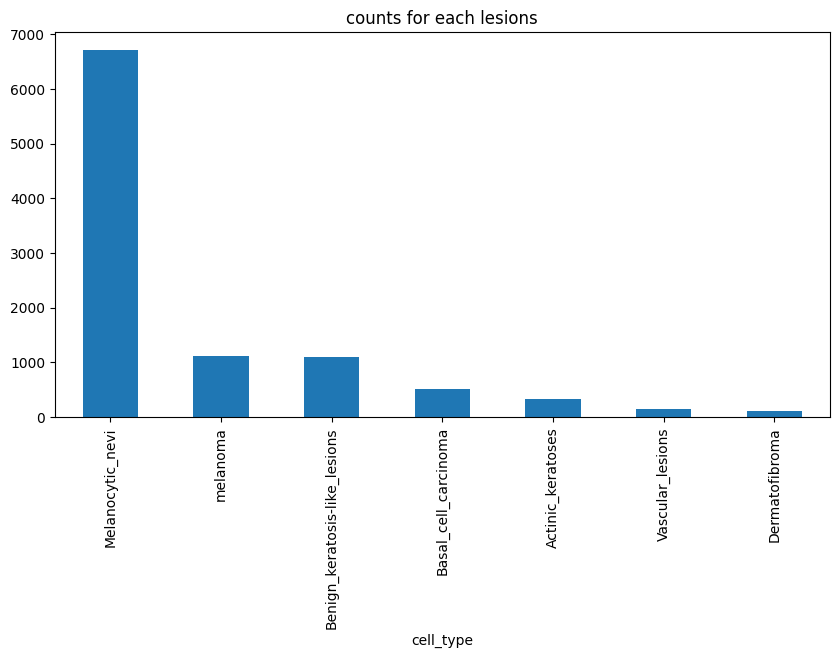

In [20]:
fig , ax1 = plt.subplots(1,1,figsize=(10,5))
skin_df['cell_type'].value_counts().plot(
        kind='bar',
        ax = ax1,
        title="counts for each lesions"
)

Heavily Biased on Melanocytic nevi

<Axes: title={'center': 'Localization'}, xlabel='localization'>

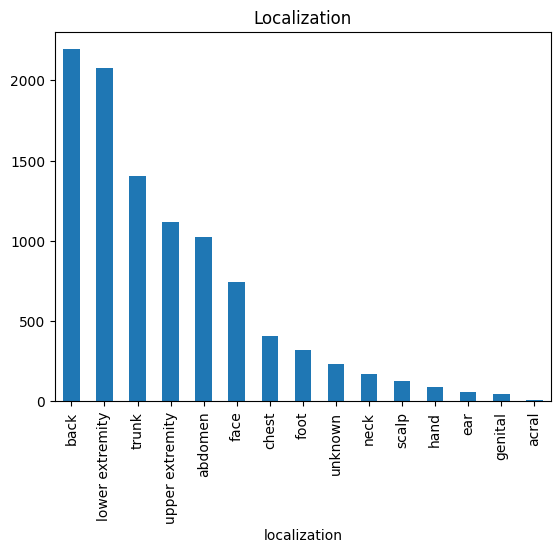

In [21]:
skin_df['localization'].value_counts().plot(
    kind='bar',
    title='Localization'
)

High data points with localization near back and lower extremity

<Axes: title={'center': 'Reveived Treatment'}, xlabel='dx_type'>

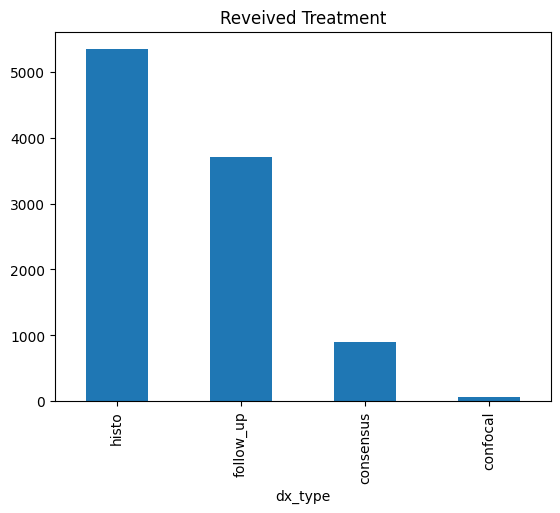

In [22]:
skin_df['dx_type'].value_counts().plot(
    kind='bar',
    title = 'Reveived Treatment'
)

Most of the patients with diagonesed with histopathologic diagoneses by specialized dermatopathologists followed by follow up i.e, monitored by digital dermatoscopy if it showed any changes during 3 follow up visits

Text(0.5, 1.0, 'Age distribution')

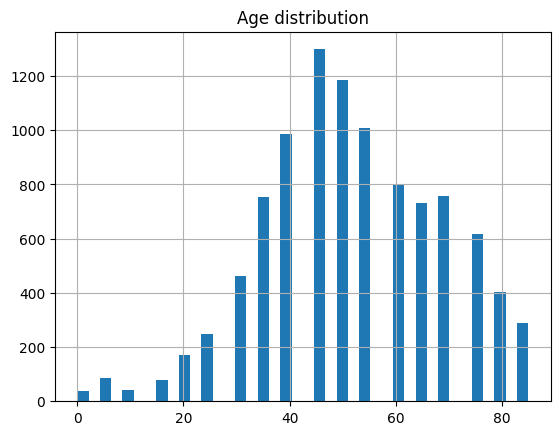

In [25]:
skin_df['age'].hist(bins=40)
plt.title('Age distribution')

Text(0.5, 1.0, 'Age distribution for malignant')

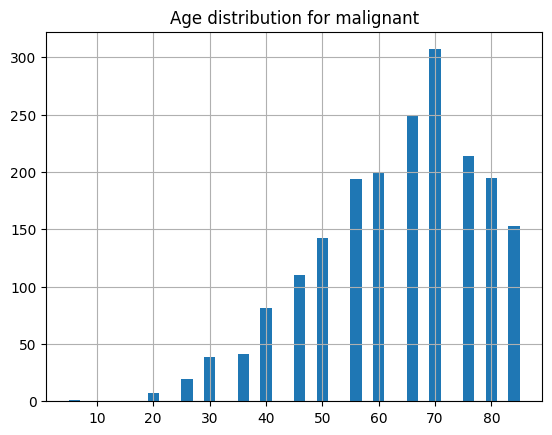

In [26]:
skin_df[skin_df['Malignant']==1]['age'].hist(bins=40)
plt.title('Age distribution for malignant')

Most Malignant patients are more than 50 with 70 being max

<Axes: title={'center': 'Gender Distribution'}, xlabel='sex'>

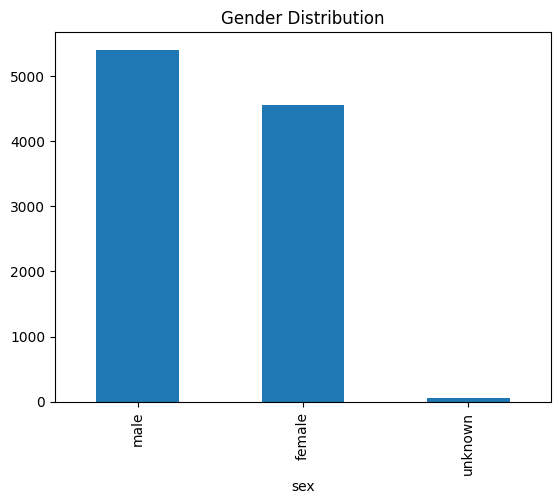

In [27]:
skin_df['sex'].value_counts().plot(
    kind='bar',
    title='Gender Distribution'
)

<Axes: title={'center': 'Gender Distribution for Malignant'}, xlabel='sex'>

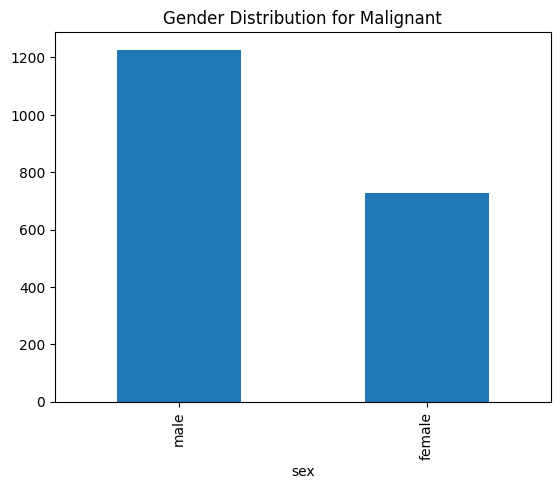

In [29]:
skin_df[skin_df['Malignant']==1]['sex'].value_counts().plot(
    kind='bar',
    title='Gender Distribution for Malignant'
)

Male Heavy on entire data set and also for malignant patients

# Let's have a look at images

In [30]:
from skimage.io import imread

skin_df['image'] = skin_df['path'].map(imread)
skin_df.iloc[0]['image']

array([[[188, 147, 191],
        [186, 148, 189],
        [187, 150, 191],
        ...,
        [196, 155, 171],
        [197, 156, 170],
        [197, 157, 168]],

       [[186, 149, 193],
        [187, 152, 194],
        [189, 153, 191],
        ...,
        [194, 156, 169],
        [195, 159, 169],
        [192, 159, 168]],

       [[185, 148, 192],
        [189, 152, 195],
        [190, 153, 196],
        ...,
        [196, 155, 169],
        [198, 157, 171],
        [194, 156, 169]],

       ...,

       [[157, 124, 155],
        [156, 121, 154],
        [159, 124, 154],
        ...,
        [177, 146, 161],
        [176, 144, 159],
        [175, 141, 155]],

       [[155, 122, 151],
        [156, 123, 154],
        [156, 123, 152],
        ...,
        [178, 147, 163],
        [175, 144, 159],
        [175, 142, 159]],

       [[154, 119, 151],
        [153, 120, 149],
        [154, 121, 152],
        ...,
        [176, 147, 167],
        [175, 147, 161],
        [173, 143, 155]]

In [31]:
skin_df['image'].map(lambda x : x.shape).value_counts

<bound method IndexOpsMixin.value_counts of 0        (450, 600, 3)
1        (450, 600, 3)
2        (450, 600, 3)
3        (450, 600, 3)
4        (450, 600, 3)
             ...      
10010    (450, 600, 3)
10011    (450, 600, 3)
10012    (450, 600, 3)
10013    (450, 600, 3)
10014    (450, 600, 3)
Name: image, Length: 10015, dtype: object>

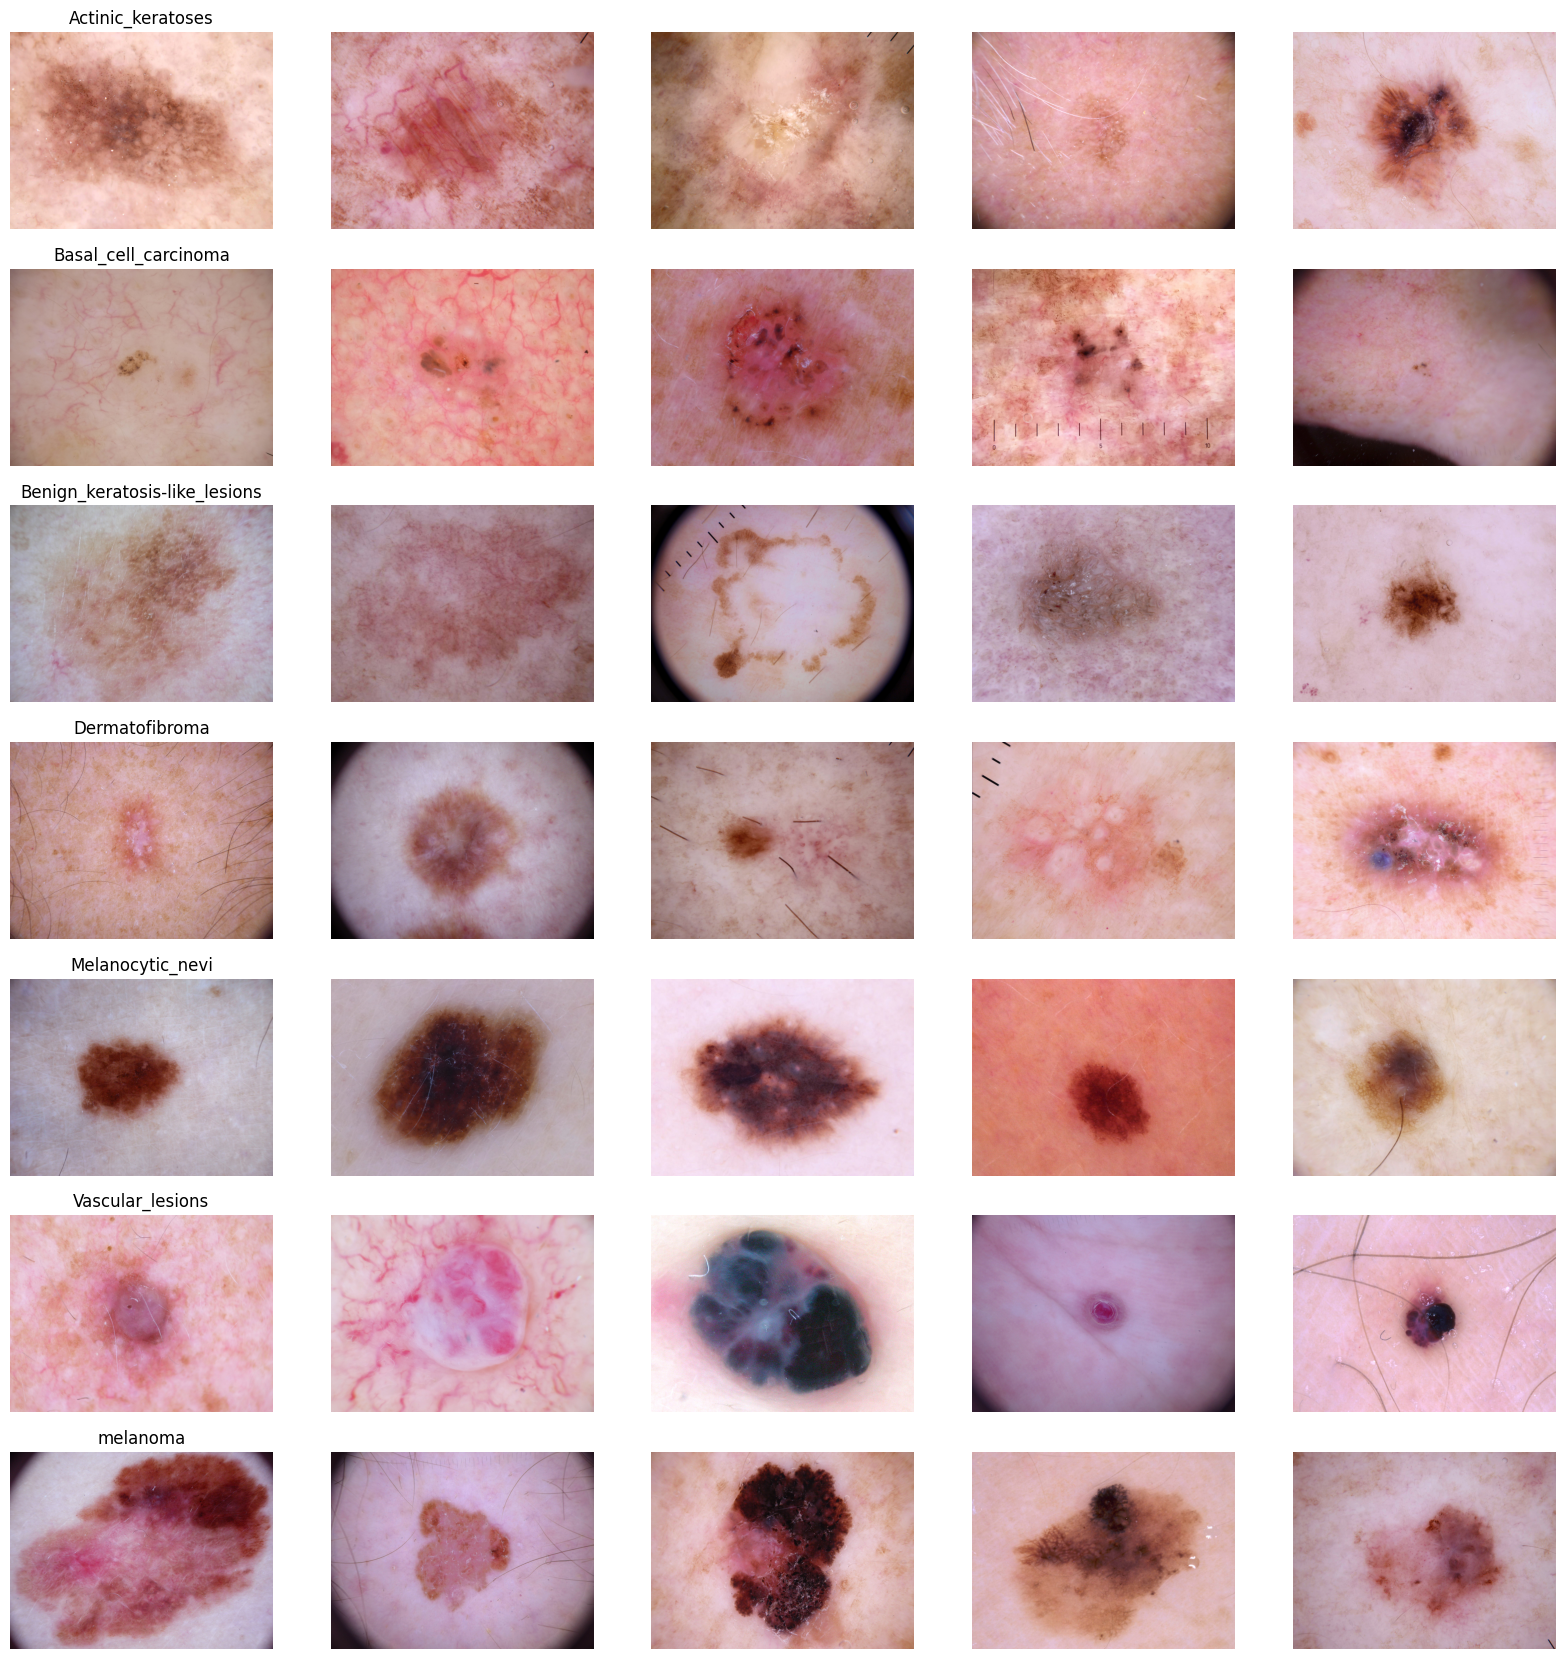

In [32]:
samples = 5
fig , m_axs = plt.subplots(7,samples,figsize = (4*samples,3*7))

for n_axs ,(type_name,type_rows) in zip(m_axs,skin_df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax,(_,c_row) in zip(n_axs,type_rows.sample(samples,random_state=0).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
fig.savefig("category_samples.png",dpi=300)

We can't tell which is which by naked eye
# Let's see if there are major difference in color distribution in images
* Mean of values for each channel axis=(0,1)

In [34]:
rgb_info = skin_df.apply(lambda x: pd.Series({'{}_mean'.format(k) :v for k,v in zip(['Red','Blue','Green'],
                                                                        np.mean(x['image'],(0,1)))}),1)

gray_col = rgb_info.apply(lambda x: np.mean(x),1)

for c_col in rgb_info.columns:
    rgb_info[c_col] = rgb_info[c_col]/gray_col

rgb_info['Gray_mean'] = gray_col

rgb_info.sample(3)

Red_mean  Blue_mean  Green_mean   Gray_mean
2761  1.188096   0.884380    0.927524  139.686425
6143  1.348526   0.808628    0.842846  159.670432
8788  1.212240   0.920538    0.867222  173.696965

In [35]:
for c_col in rgb_info:
    skin_df[c_col] = rgb_info[c_col].values

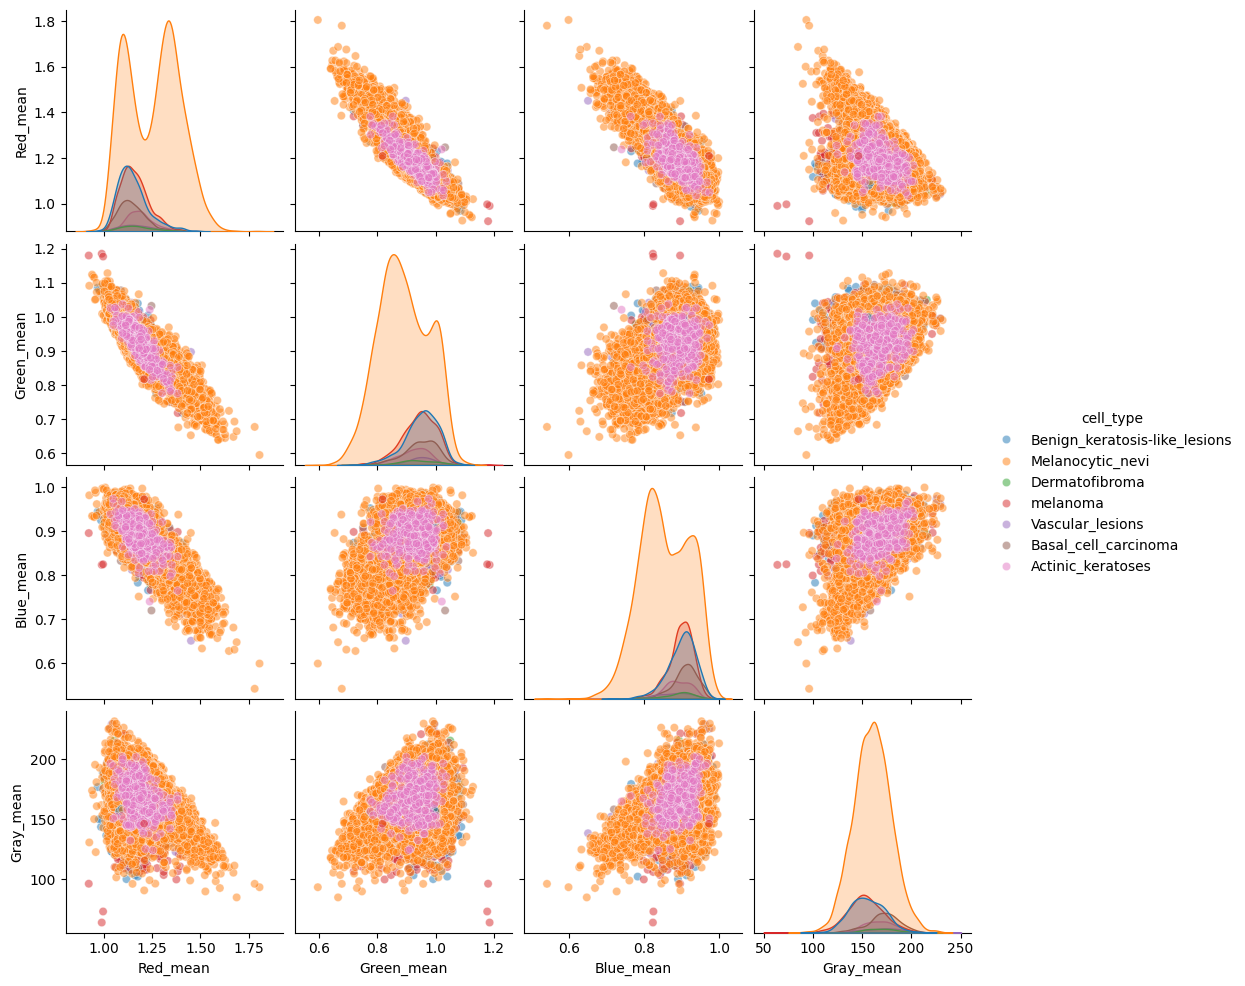

In [36]:
sns.pairplot(skin_df[['Red_mean','Green_mean','Blue_mean','Gray_mean','cell_type']],
             hue='cell_type',plot_kws={'alpha':0.5})

# Reshaping the images

### For baseline model

In [38]:
from PIL import Image
reshaped = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((64,64),
                                                    resample = Image.LANCZOS).convert("RGB")).ravel())

In [39]:
output_vector = np.stack(reshaped,0)

output_df = pd.DataFrame(output_vector)
output_df['label'] = skin_df['cell_type_idx']
output_df.head()

0    1    2    3    4    5    6    7    8    9  ...  12279  12280  12281  \
0  191  152  194  191  153  195  192  149  192  194  ...    185    154    180   
1   24   13   23   24   14   28   37   24   46   61  ...     26     15     29   
2  185  129  140  192  136  151  198  142  156  198  ...    152    120    138   
3   24   11   19   36   19   30   64   38   50   91  ...     27     13     16   
4  138   94  117  158  113  138  178  133  161  191  ...    140    106    118   

   12282  12283  12284  12285  12286  12287  label  
0    186    156    184    182    152    173      2  
1     27     15     28     24     13     25      2  
2    144    113    123    115     81     84      2  
3     25     12     16     24      9     14      2  
4    108     77     92     67     40     55      2  

[5 rows x 12289 columns]

In [40]:
output_path = "hm10000_64_64_RGB.csv"
output_df.to_csv(output_path,index=False)

### For Retraining

In [41]:
img = Image.open(skin_df['path'][0])
img.size

(600, 450)

In [62]:
skin_df['cell_type'].unique()

array(['Benign_keratosis-like_lesions', 'Melanocytic_nevi',
       'Dermatofibroma', 'melanoma', 'Vascular_lesions',
       'Basal_cell_carcinoma', 'Actinic_keratoses'], dtype=object)

In [63]:
skin_df['path'][0]

'/Users/ankitsanjyal/Desktop/Projects/Data/Hamm10000/HAM10000_images_part_1/ISIC_0027419.jpg'

In [66]:
import os
from PIL import Image

for index in skin_df.index.values.tolist():
    path = skin_df.iloc[index]['path']
    cell_type_idx = skin_df.iloc[index]['cell_type']
    img_id = skin_df.iloc[index]['image_id']
    
    # Create the target directory if it doesn't exist
    target_dir = f"/Users/ankitsanjyal/Desktop/Projects/Data/Hamm10000/lesion_types/{cell_type_idx}"
    os.makedirs(target_dir, exist_ok=True)

    newpath = os.path.join(target_dir, f"{img_id}.jpg")
    
    img = Image.open(path)
    img = img.resize((299, 299), resample=Image.LANCZOS)
    img.save(newpath)


### For Keras finetuning

In [69]:
reshaped_image = skin_df["path"].map(lambda x: np.asarray(Image.open(x).resize((256,192), resample=Image.LANCZOS).\
                                                          convert("RGB")))

In [70]:
output_vector = np.stack(reshaped_image,0)
print(output_vector.shape)

(10015, 192, 256, 3)


In [71]:
output_vector = output_vector.astype("float32")
output_vector /= 255

In [72]:
labels = skin_df['cell_type_idx'].values

In [73]:
from sklearn.model_selection import train_test_split
X_train_original, X_test , y_train_original,y_test = train_test_split(output_vector,labels,test_size=0.1,random_state=0)

np.save("../data/256_192_test.npy", X_test)
np.save("../data/test_labels.npy", y_test)

X_train,X_val,y_train,y_val = train_test_split(X_train_original,y_train_original,test_size=0.1,random_state=1)
np.save("../data/256_192_val.npy", X_val)
np.save("../data/val_labels.npy", y_val)

np.save("../data/256_192_train.npy", X_train)
np.save("../data/train_labels.npy", y_train)

In [76]:
! ls ../data/ 

256_192_test.npy      hm10000_64_64_RGB.csv val_labels.npy
256_192_train.npy     test_labels.npy
256_192_val.npy       train_labels.npy
